About DataSet and tasks

This is the restaurant data from zomato for more than 10000 restaurants across india. This analysis is performed to find the answers for some tasks like :
1. City with cheap restaurants
2. City with largest number of votes
3. City with most expensive restaurants
4. City with excellent rating
5. From which city maximum hotels are listed in Zomato and from which Locality
6. How many of restaurants accept online delivery


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('zomato.csv', engine='python')

In [3]:
#reading first 5 rows
data.head()

,Restaurant ID,Restaurant Name,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3400025,Jahanpanah,India,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,3400341,Rangrezz Restaurant,India,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,3400005,Time2Eat - Mama Chicken,India,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,India,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,3400017,Pinch Of Spice,India,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [4]:
#droping extra columns 
data.drop('Currency',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country               8652 non-null   object 
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Has Table booking     8652 non-null   object 
 12  Has Online delivery   8652 non-null   object 
 13  Is delivering now     8652 non-null   object 
 14  Switch to order menu  8652 non-null   object 
 15  Price range          

In [6]:
data.describe()

,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.652000e+03,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
std,8.959437e+06,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513
min,5.300000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.007402e+05,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000
50%,2.200006e+06,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000
75%,1.836120e+07,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000
max,1.850065e+07,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000


In [7]:
#Checking if dataset contains any null
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country                 0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

understanding the data and 
Understant how rating works

In [8]:
rating=data.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2139
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,26
6,2.3,Red,Poor,46
7,2.4,Red,Poor,83
8,2.5,Orange,Average,109
9,2.6,Orange,Average,190


Text(0, 0.5, 'Rating Count')

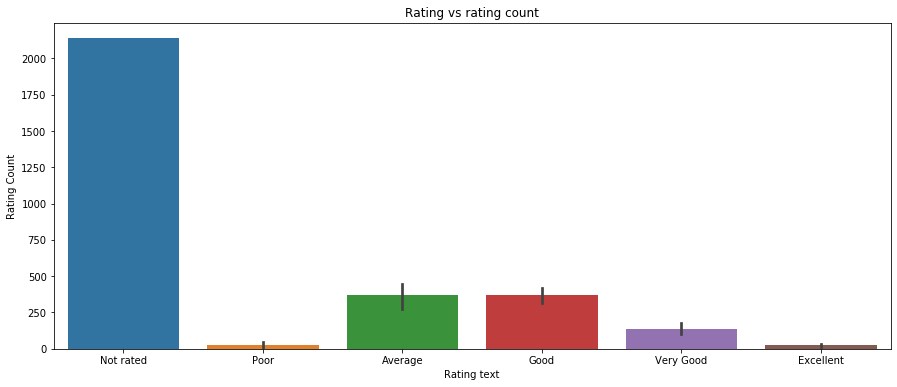

In [9]:
#now lets see this in graph
plt.figure(figsize=(15,6))
sns.barplot(x=rating['Rating text'],y=rating['Rating Count'])
plt.title('Rating vs rating count')
plt.xlabel("Rating text")
plt.ylabel("Rating Count")

From above graph it is clear that maximum number of Restaurant are not rated

No     6229
Yes    2423
Name: Has Online delivery, dtype: int64

Text(0.5, 1.0, 'Online delivery ')

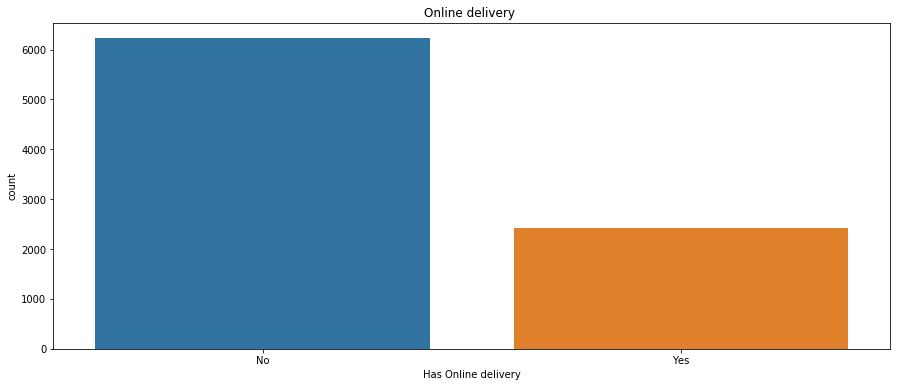

In [29]:
#now lets see about online delivery 
display(data['Has Online delivery'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(data['Has Online delivery'])
plt.title('Online delivery ')

From the above graph it is clear that maximum number of restaurants does not support online delivery 

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Ahmedabad         21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Name: City, dtype: int64

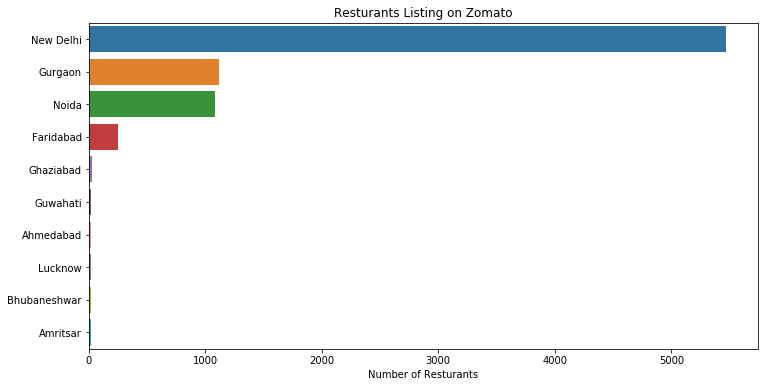

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['City'].value_counts().head(10), y=data['City'].value_counts().head(10).index)
plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listed on Zomato')
display(data['City'].value_counts().head(10))

From graph it is clear that delhi has the maximum number of restaurants. Now see which Locality in delhi has maximum hotels listed in Zomato

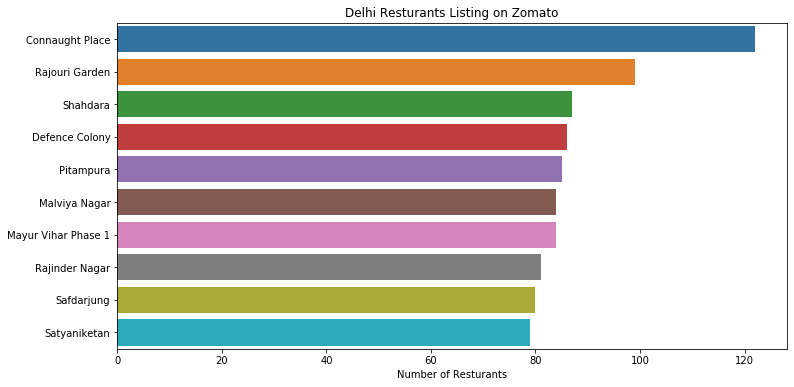

In [39]:
Delhi = data[(data.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)
plt.xlabel('Number of Resturants')
plt.title('Delhi Resturants Listing on Zomato');

Text(0.5, 1.0, 'City with top Rated restaurants ')

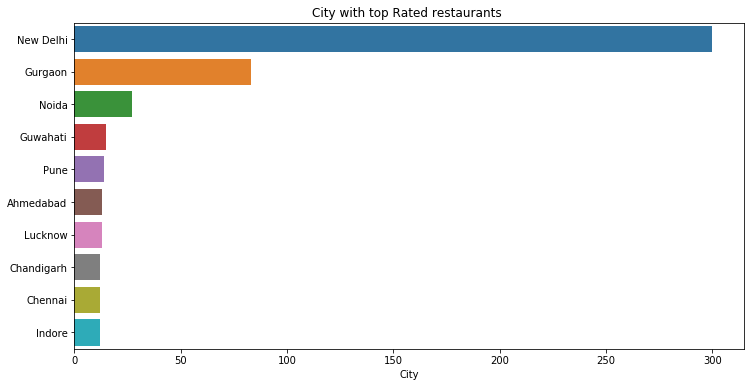

In [118]:
#City with top Rated restaurants 
A_rating =data[(data['Rating text'] == 'Very Good')]
plt.figure(figsize=(12,6))
sns.barplot(x=A_rating.City.value_counts().head(10), y=A_rating.City.value_counts().head(10).index)
plt.title('City with top Rated restaurants ')

In [57]:
A_rating.City.value_counts().head(10)

New Delhi     300
Gurgaon        83
Noida          27
Guwahati       15
Pune           14
Ahmedabad      13
Lucknow        13
Chandigarh     12
Chennai        12
Indore         12
Name: City, dtype: int64

Above graphs shows that the most top rated restaurants are from Delhi

Now let's see What are most common Cuisines in accros India

Text(0.5, 1.0, 'Top 10 cuisines on Zomato')

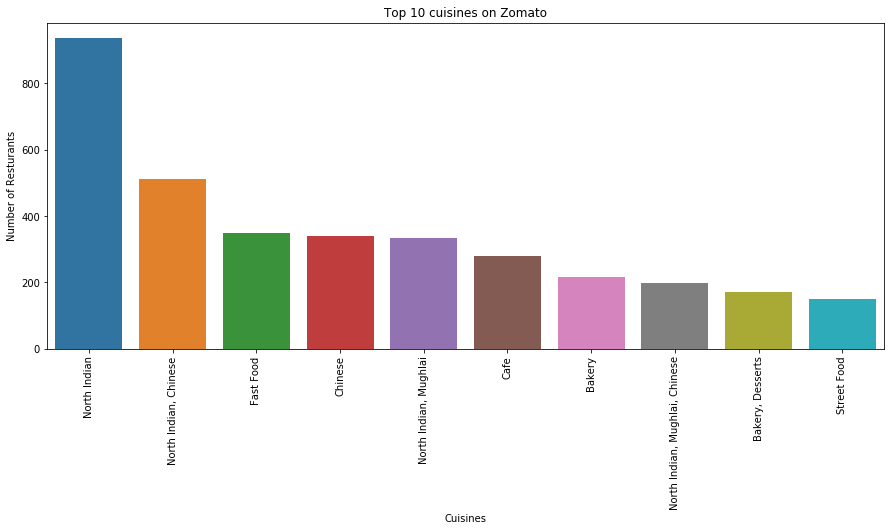

In [74]:
p_cuisine = data.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count()
p_cuisine.columns = ['Cuisines','Number of Resturants']
top=(p_cuisine.sort_values(['Number of Resturants'],ascending=False)).head(10)
plt.figure(figsize=(15,6))
sns.barplot(top['Cuisines'],top['Number of Resturants'])
plt.xticks(rotation = 90)
plt.title('Top 10 cuisines on Zomato')

City with largest number of votes

Text(0.5, 1.0, 'Top 10 City Voted on Zomato')

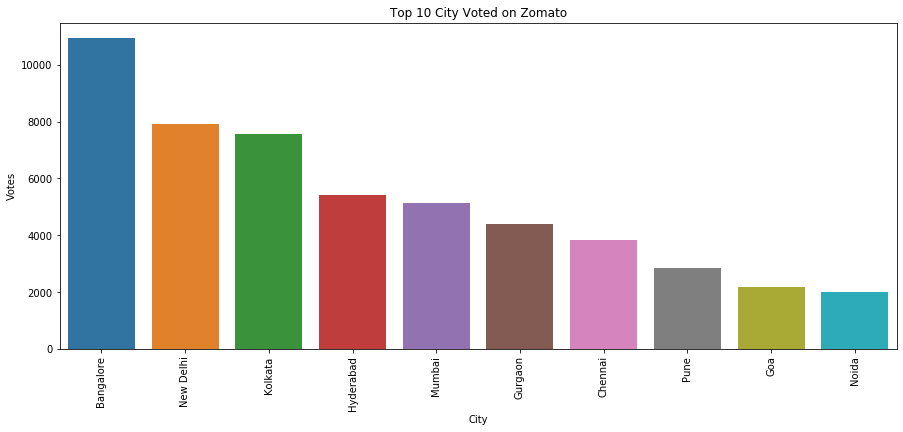

In [105]:

City_max_vote=data.groupby('City')['Votes'].max()
City_max_vote=City_max_vote.reset_index()
top1=City_max_vote.sort_values(by=['Votes'],ascending=False).head(10)
plt.figure(figsize=(15,6))
sns.barplot(top1['City'],top1['Votes'])
plt.xticks(rotation = 90)
plt.title('Top 10 City Voted on Zomato')

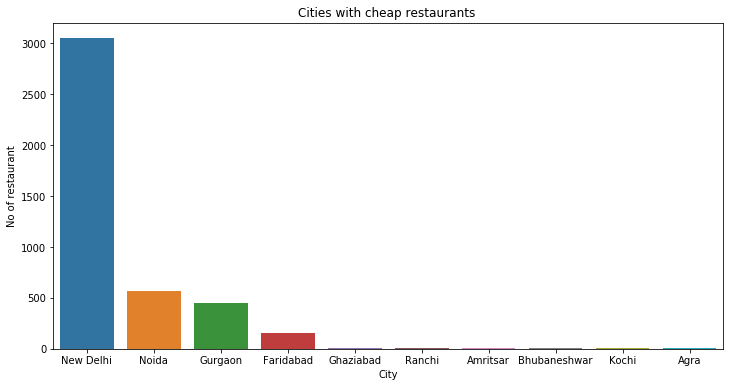

In [113]:
#Top Cities with cheap restaurants 
cheap = data[(data['Price range'] == 1)]
plt.figure(figsize=(12,6))
sns.barplot(y=cheap.City.value_counts().head(10), x=cheap.City.value_counts().head(10).index)
plt.xlabel('City')
plt.ylabel('No of restaurant')
plt.title('Cities with cheap restaurants ');

In [ ]:
##Top Cities with most expensive restaurants 

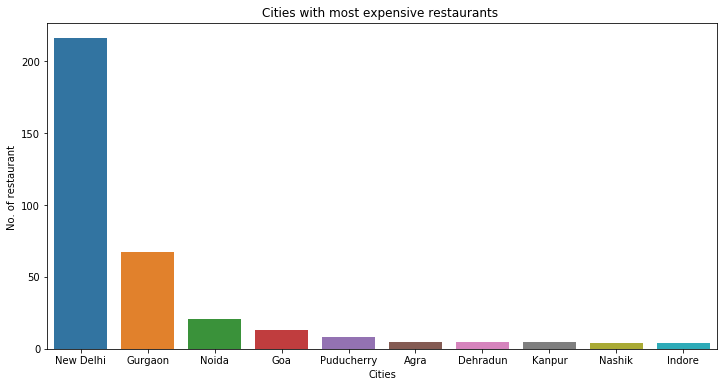

In [117]:
expensive = data[(data['Price range'] == 4)]
plt.figure(figsize=(12,6))
sns.barplot(x=expensive.City.value_counts().head(10).index, y=expensive.City.value_counts().head(10))
plt.xlabel('Cities')
plt.ylabel('No. of restaurant ')
plt.title('Cities with most expensive restaurants ');